In [3]:
import pandas as pd 
import pandas as pd 
import numpy as np 
import pandas as pd 
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd   
from IPython.display import display_html 


     ------------------------------------ 288.2/288.2 kB 808.1 kB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 161.3/161.3 kB 1.9 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Data Set 1
## Domain Taxonomy
http://odds.cs.stonybrook.edu/forestcovercovertype-dataset/

Dataset Information
The original ForestCover/Covertype dataset from UCI machine learning repository is a multiclass classification dataset. It is used in predicting forest cover type from cartographic variables only (no remotely sensed data). This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices. This dataset has 54 attributes (**10 quantitative variables**, 4 binary wilderness areas and 40 binary soil type variables). Here, outlier detection dataset is created using only 10 quantitative attributes. Instances from class 2 are considered as normal points and instances from class 4 are anomalies. The anomalies ratio is **0.9%**. Instances from the other classes are omitted.

In [ ]:
pip install mat73

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy.io as sio
test = sio.loadmat('/content/drive/MyDrive/Anomaly detection/cover.mat')
test
df = pd.DataFrame(np.hstack((test['X'], test['y'])))
df[10].value_counts()

0    283301
1      2747
Name: 10, dtype: int64

In [ ]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,2804,139,9,268,65,3180,234,238,135,6121,0
1,2785,155,18,242,118,3090,238,238,122,6211,0
2,2579,132,6,300,-15,67,230,237,140,6031,0
3,2886,151,11,371,26,5253,234,240,136,4051,0
4,2742,134,22,150,69,3215,248,224,92,6091,0


## Helper Functions 

In [ ]:
def scaled(df):
    from sklearn.preprocessing import StandardScaler, normalize
    import pandas as pd 
    x_scaled = normalize(df)
    df_scaled=pd.DataFrame(x_scaled,columns=list(df.columns))
    return df_scaled 

def pca(data,n):
    
    """This function is used to reduced the dimention of data frame """
    
    pca = PCA(n)
 
    df_pca = pca.fit_transform(data)
    
    principalDf = pd.DataFrame(data =df_pca
             , columns = ['principal component 1', 'principal component 2'])
    
    return principalDf

def scatter(df,x,y,label):
    """Scatter plot betwween x and y variables """
    import seaborn as sns
    sns.scatterplot(data=df,x=x,y=y,hue=label)
    
def bic(X):

  bic_scores = []
  no_of_comp=[]
  for i in range (1,10):
      #print(i)
      gm = GaussianMixture(n_components=i, random_state=0).fit(X_train)
      #print(gm.bic(X_train))
      bic_scores.append(gm.bic(X_train))
      no_of_comp.append(i)
      plt.plot(no_of_comp,bic_scores) 
  plt.show()
  print(bic_scores)
  print(no_of_comp)

    
    
    
    
    




In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [ ]:
dfscaled=scaled(x)
dfpca=pca(dfscaled,2)
dfpca['Labels']=y
dfpca.head(4)

,principal component 1,principal component 2,Labels
0,-0.096859,0.476134,0
1,-0.087083,0.488507,0
2,0.266500,0.642218,0
3,-0.350350,0.172980,0


## Plot

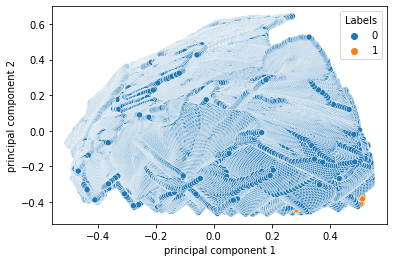

In [ ]:
scatter(dfpca,'principal component 1','principal component 2','Labels')

In [ ]:
dfscaled['Label']=y


Data preparation for training GMM

In [ ]:
#seperating inliers and ouliers 

inliers=dfscaled[dfscaled['Label']==0] 
outliers=dfscaled[dfscaled['Label']==1]
X_outlier=outliers.iloc[:,:-1]

X_inlier=inliers.iloc[:,:-1]
X_inlier.head(4)

,0,1,2,3,4,5,6,7,8,9
0,0.375821,0.018630,0.001206,0.035920,0.008712,0.426216,0.031363,0.031899,0.018094,0.820399
1,0.371810,0.020693,0.002403,0.032308,0.015754,0.412529,0.031774,0.031774,0.016288,0.829196
2,0.392087,0.020068,0.000912,0.045609,-0.002280,0.010186,0.034967,0.036031,0.021284,0.916897
3,0.397830,0.020815,0.001516,0.051142,0.003584,0.724117,0.032256,0.033084,0.018747,0.558423


Train Test Split

In [ ]:
#Traing Test split the inliers data  
X_train, X_test = train_test_split(X_inlier, test_size=0.3, random_state=1)


No of Components Selection 

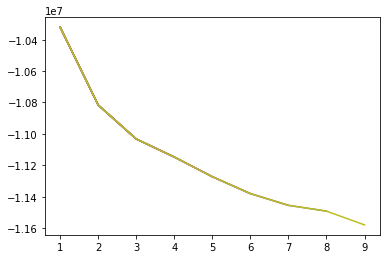

[-10320926.871245708, -10816558.150533643, -11032698.546219693, -11147505.419434508, -11272816.921848446, -11380459.372223752, -11455132.40982607, -11491946.99716359, -11579765.768467873]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
bic(X_train)

Fit GMM 


In [ ]:
gm = GaussianMixture(n_components=4, random_state=0).fit(X_train)


Predicting the components for each data Points (Train/Test)


In [ ]:
train_components=gm.predict(X_train)
test_components=gm.predict(X_test)

In [ ]:
#Frequency count of each predicted components 
import collections
print("frequncy of train clusters",collections.Counter(train_components))
print("frequncy of test clusters",collections.Counter(test_components))

frequncy of train clusters Counter({0: 63464, 3: 48156, 2: 44674, 1: 42016})
frequncy of test clusters Counter({0: 26999, 3: 20884, 2: 19320, 1: 17788})


Test Performance 

Estimated no of clusters of Test data


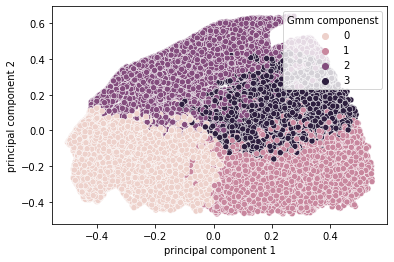

In [ ]:
# Plot estimated no of components of test data 
X_test
test_components
testdf=pca(X_test,2)
testdf['Gmm componenst']=test_components
testdf
print('Estimated no of clusters of Test data')
scatter(testdf,'principal component 1','principal component 2','Gmm componenst')

In [ ]:
#Calculating the probability Matrix of each test data point 

test_prob=gm.predict_proba(X_test).round(1)


# Finding Hard and soft members if prob>0.9 , Hard Member else soft members

Hard_member=np.any(test_prob >0.9, axis=1)
Hard_members=np.array(np.where(Hard_member==True)).size

#checking the no of hard and soft members in testing data 

Total_test=test_prob.shape[0]
soft_members=Total_test-Hard_members
print("Test performance")
print(" ")
print("Test size",Total_test)
print("No of Hard members",Hard_members)
print("No of Soft Members",soft_members)

Test performance
 
Test size 84991
No of Hard members 62872
No of Soft Members 22119


In [ ]:
 
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_test,test_components))

Silhouette Coefficient: 0.272


Passing Anomalous data to the trained GMM and check where majority of points settled 

In [ ]:
#checking the no of hard and soft members in outliers data 

Outliers_components=gm.predict(X_outlier)
print(collections.Counter(Outliers_components))
Anomaly_prob=gm.predict_proba(X_outlier).round(1)
Hard_member=np.any(Anomaly_prob >0.9, axis=1)
Hard_members=np.array(np.where(Hard_member==True)).size
Total_Anamolies =Anomaly_prob.shape[0]
soft_members=Total_Anamolies-Hard_members
print("Total Anomalies count",Total_Anamolies)
print("No of Hard members",Hard_members)
print("No of Soft Members",soft_members)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_outlier,Outliers_components))

Counter({1: 2385, 3: 362})
Total Anomalies count 2747
No of Hard members 2377
No of Soft Members 370
Silhouette Coefficient: 0.276


# Statistical Distance 

Our GMM model suggest that Anomalies belong to 2 components (1,3) however majority of the data point are well settled in component 1  and are hard members of component 1 . 
Now we have clear evidence of anomolous component and we can hypothetically say that any data point close to component 1 has a high probability of being marked as "Anomaly".

In the next few cells we will try to prove our hypothsis 'True' by using a statistical distances (mahalanobis distance) or (Kl divergence ) .Statistical distance quantifies the distance between two statistical objects. In our case we are interested to find the distance between Gausian components and Anomalies.

Mahalanobis distance is an extremely useful metric having, excellent applications in multivariate anomaly detection, classification on highly imbalanced datasets . It takes into account the correlations between the different dimensions of the data when calculating the distance, rather than treating each dimension independently like the Euclidean distance does.
The covariance matrix is used in the calculation of the Mahalanobis distance because it encodes the correlations between the different dimensions of the data. This allows the distance measure to effectively capture the relationships between the dimensions and provide a more accurate reflection of the distance between the two points in the multivariate space.



In [ ]:
# Seperating the components 
test_new=X_test.copy() 
test_new["Components"]=test_components
comp0=test_new[test_new['Components']==0]
comp1=test_new[test_new['Components']==1]
comp2=test_new[test_new['Components']==2]
comp3=test_new[test_new['Components']==3]

In [ ]:
# components Mean and inverse covariance 

# 1st component

Mean_comp0=comp0.iloc[:,:-1].mean().values.reshape(1,-1)
print("Shape of mean vector",Mean_comp0.shape)
cov_comp0=comp0.iloc[:,:-1].cov()
inv0=np.linalg.inv(cov_comp0)
print("Shape of inverse covariance matrix",inv0.shape)

# 2nd  component

Mean_comp1=comp1.iloc[:,:-1].mean().values.reshape(1,-1)

cov_comp1=comp1.iloc[:,:-1].cov()
inv1=np.linalg.inv(cov_comp1)


# 3rd  component

Mean_comp2=comp2.iloc[:,:-1].mean().values.reshape(1,-1)
cov_comp2=comp2.iloc[:,:-1].cov()
inv2=np.linalg.inv(cov_comp2)


# 4th  component

Mean_comp3=comp3.iloc[:,:-1].mean().values.reshape(1,-1)
cov_comp3=comp3.iloc[:,:-1].cov()
inv3=np.linalg.inv(cov_comp3)


Shape of mean vector (1, 10)
Shape of inverse covariance matrix (10, 10)


In [ ]:
# calculating point to distribution distance using Mahalonabis distance formula 
from scipy.spatial.distance import mahalanobis

#distance from distribution 1 
distance0=[]
for index, row in X_outlier.iterrows():
    inputs=row.values.reshape(1,-1)
    dist=mahalanobis(
    inputs, Mean_comp0, inv0
)
    distance0.append(dist)


#distance from distribution 2
distance1=[]
for index, row in X_outlier.iterrows():
    inputs=row.values.reshape(1,-1)
    dist=mahalanobis(
    inputs, Mean_comp1, inv1
)
    distance1.append(dist) 

#distance from distribution 3
distance2=[]
for index, row in X_outlier.iterrows():
    inputs=row.values.reshape(1,-1)
    dist=mahalanobis(
    inputs, Mean_comp2, inv2
)
    distance2.append(dist) 

#Distance from distribution 4

distance3=[]
for index, row in X_outlier.iterrows():
    inputs=row.values.reshape(1,-1)
    dist=mahalanobis(
    inputs, Mean_comp3, inv3
)
    distance3.append(dist) 

In [ ]:
# Creating df for point to Gausian Distribution 

mahalanobisdf=X_outlier.copy()

mahalanobisdf['dist_0']=distance0
mahalanobisdf['dist_1']=distance1
mahalanobisdf['dist_2']=distance2
mahalanobisdf['dist_3']=distance3
mahalanobisdf['Gausian Components']=Outliers_components

In [ ]:
mahalanobisdf

,0,1,2,3,4,5,6,7,8,9,dist_0,dist_1,dist_2,dist_3,Gausian Components
825,0.963331,0.153170,0.003372,0.01445,0.001927,0.052020,0.096815,0.112710,0.082846,0.129086,27.673560,7.866205,25.786422,16.836283,1
828,0.959664,0.170085,0.002875,0.00000,0.000000,0.060847,0.101093,0.110196,0.075221,0.135589,27.461827,8.363071,26.371927,16.999911,1
831,0.972258,0.022802,0.003881,0.00000,0.000000,0.072774,0.108190,0.108190,0.065496,0.145548,26.563332,6.880204,23.460863,15.449900,1
833,0.970183,0.035306,0.005320,0.00000,0.000000,0.082219,0.112688,0.105434,0.055619,0.154281,25.649568,6.685724,22.951472,14.870807,1
834,0.968210,0.038130,0.007723,0.00000,0.000000,0.092670,0.115838,0.100875,0.045852,0.163621,25.129377,6.836474,23.243767,14.596392,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175163,0.876769,0.010257,0.001768,0.00000,0.000000,0.144301,0.077102,0.080992,0.051991,0.441744,17.515904,4.035808,8.947210,4.579147,3
176517,0.910298,0.027701,0.005002,0.00000,0.000000,0.227767,0.090414,0.082335,0.041937,0.319335,14.326806,3.388205,11.711299,5.993295,1
176740,0.919796,0.052026,0.006354,0.00000,0.000000,0.239878,0.096904,0.091344,0.044083,0.272047,14.795653,4.101596,13.838226,7.755868,1
176982,0.903454,0.025075,0.004939,0.00000,0.000000,0.246569,0.088142,0.080923,0.041791,0.325973,13.333374,3.233807,10.877893,5.494783,1


In [ ]:
mahalanobisdf.describe()

,0,1,2,3,4,5,6,7,8,9,dist_0,dist_1,dist_2,dist_3,Gausian Components
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,0.844779,0.052178,0.007071,0.038903,0.015093,0.342802,0.086928,0.082548,0.042368,0.313526,13.943175,5.243491,16.001589,9.240138,1.263560
std,0.062110,0.033885,0.003738,0.049781,0.021570,0.128982,0.012126,0.010418,0.019376,0.156989,4.092360,1.002296,4.146935,3.384609,0.676626
min,0.728880,0.000000,0.000000,0.000000,-0.008769,0.021092,0.047480,0.054475,0.000000,0.000000,8.169721,3.064902,7.416531,3.774628,1.000000
25%,0.793139,0.031478,0.004021,0.000000,0.000000,0.242305,0.079667,0.074970,0.027072,0.190300,10.703159,4.528034,13.185560,6.596496,1.000000
50%,0.833949,0.044512,0.006853,0.012037,0.002284,0.368293,0.086311,0.081862,0.042553,0.298993,12.556570,5.103182,15.185366,8.381744,1.000000
75%,0.895496,0.060743,0.009560,0.072342,0.027039,0.447334,0.093587,0.089209,0.057103,0.445190,16.506871,5.780225,18.522299,11.173176,1.000000
max,0.987882,0.170085,0.019340,0.187551,0.098274,0.607065,0.119547,0.113868,0.100967,0.629160,28.961666,8.912511,28.898614,20.049133,3.000000


In [ ]:
import seaborn as sns
sns.barplot(data=mahalanobisdf, x="island", y="body_mass_g", hue="sex")

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#Export csv
mahalanobisdf.to_csv('mahalanobisdf.csv')
